In [27]:
from sklearn.datasets import load_sample_image

In [28]:
df = load_sample_image('flower.jpg')

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)
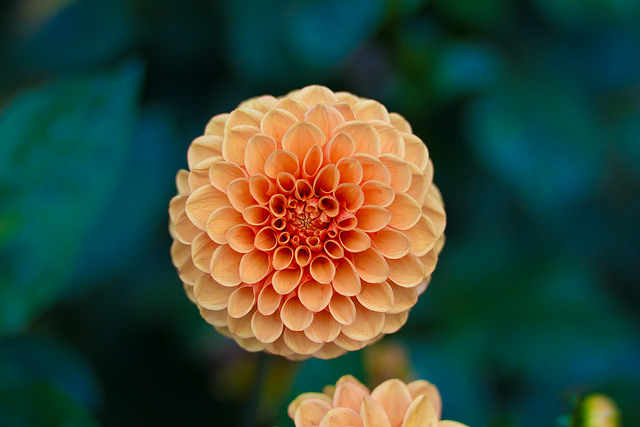

In [29]:
df

In [30]:
df = (df - df.min()) / (df.max() - df.min())

In [31]:
df

array([[[0.00784314, 0.0745098 , 0.05098039],
        [0.01176471, 0.07058824, 0.05098039],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.00392157, 0.30196078, 0.25098039],
        [0.        , 0.29803922, 0.25098039],
        [0.        , 0.29411765, 0.24705882]],

       [[0.00392157, 0.07058824, 0.04705882],
        [0.01176471, 0.07058824, 0.05098039],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.        , 0.29803922, 0.25098039],
        [0.00392157, 0.29019608, 0.25490196],
        [0.00392157, 0.29019608, 0.25490196]],

       [[0.00784314, 0.06666667, 0.04705882],
        [0.02352941, 0.0745098 , 0.04705882],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.00392157, 0.29019608, 0.25490196],
        [0.00392157, 0.29019608, 0.2627451 ],
        [0.00392157, 0.29019608, 0.2627451 ]],

       ...,

       [[0.        , 0.18039216, 0.15686275],
        [0.00392157, 0.18823529, 0.15686275],
        [0.00392157, 0

In [32]:
X = df.reshape(-1, 3)

In [33]:
X.shape

(273280, 3)

In [34]:
df.shape

(427, 640, 3)

In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(
    n_clusters=5,
    random_state=42,
)

In [37]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [38]:
kmeans.cluster_centers_

array([[0.00434842, 0.30667721, 0.32043679],
       [0.86274432, 0.62867381, 0.39951319],
       [0.02442174, 0.21174398, 0.18849967],
       [0.71409262, 0.29502908, 0.1088473 ],
       [0.03212367, 0.11335493, 0.07703705]])

In [39]:
kmeans.labels_

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [40]:
new_pixels = kmeans.cluster_centers_[kmeans.labels_]

In [42]:
h, w, c = df.shape
df.shape

(427, 640, 3)

In [43]:
new_image = new_pixels.reshape(h, w, c)

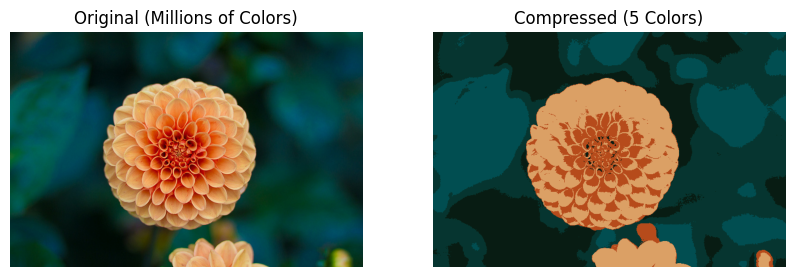

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot Original
plt.subplot(1, 2, 1)
plt.title("Original (Millions of Colors)")
plt.imshow(df)
plt.axis('off')

# Plot Your Masterpiece
plt.subplot(1, 2, 2)
plt.title(f"Compressed ({kmeans.n_clusters} Colors)")
plt.imshow(new_image)
plt.axis('off')

plt.show()